<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Bitcoin_TA_Daily_Prophet_Bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from_symbol = 'BTC'
to_symbol = 'USD'
exchange = 'Bitstamp'
datetime_interval = 'day'

In [67]:
import requests
from datetime import datetime
import pandas as pd
 
 
 
utxo = pd.read_csv('utxo.csv')
hashrate = pd.read_csv('hashrate.csv')
fees_per = pd.read_csv('fees_per.csv')
difficulty = pd.read_csv('difficulty.csv')
trade_volume = pd.read_csv('trade_volume.csv')
transactions_per_block = pd.read_csv('transactions_per_block.csv')
avg_block_size = pd.read_csv('avg_block_size.csv')
addresses = pd.read_csv('addresses.csv')

#below are some of the core components of making csv sheets out of on chain data if necessary from json files. (Note the cell above this has since been changed to load from the csvs)

In [ ]:
utxo_cleaned = pd.DataFrame()
hashrate_cleaned = pd.DataFrame()
fees_per_cleaned = pd.DataFrame()
difficulty_cleaned = pd.DataFrame()
trade_volume_cleaned = pd.DataFrame()
transactions_per_block_cleaned = pd.DataFrame()
avg_block_size_cleaned = pd.DataFrame()

In [ ]:
def unpack(df, df2):
  times = []
  y = []
  for i in df['values']:
    time = i['x']
    value = i['y']
    times.append(time)
    y.append(value)
    #new_time = times
    #new_value = y 
  df2['time'] = times
  df2['y'] = y
  return df2

In [ ]:
unpack(utxo, utxo_cleaned)
unpack(hashrate, hashrate_cleaned)
unpack(fees_per, fees_per_cleaned)
unpack(difficulty, difficulty_cleaned)
unpack(trade_volume, trade_volume_cleaned)
unpack(transactions_per_block, transactions_per_block_cleaned)
unpack(avg_block_size, avg_block_size_cleaned)

In [ ]:
utxo_cleaned.to_csv('on-chain data/utxo.csv')
hashrate_cleaned.to_csv('on-chain data/hashrate.csv')
fees_per_cleaned.to_csv('on-chain data/fees_per.csv')
difficulty_cleaned.to_csv('on-chain data/difficulty.csv')
trade_volume_cleaned.to_csv('on-chain data/trade_volume.csv')
transactions_per_block_cleaned.to_csv('on-chain data/transactions_per_block.csv')
avg_block_size_cleaned.to_csv('on-chain data/avg_block_size.csv')

In [ ]:
transactions_per_block

#This marks the end of the json processing

In [68]:
addresses

,Unnamed: 0,t,v
0,0,2009-01-03T00:00:00Z,NaN
1,1,2009-01-04T00:00:00Z,NaN
2,2,2009-01-05T00:00:00Z,NaN
3,3,2009-01-06T00:00:00Z,NaN
4,4,2009-01-07T00:00:00Z,NaN
...,...,...,...
4281,4281,2020-09-23T00:00:00Z,1016908.0
4282,4282,2020-09-24T00:00:00Z,945647.0
4283,4283,2020-09-25T00:00:00Z,1148102.0
4284,4284,2020-09-26T00:00:00Z,951444.0


In [69]:
onchain = pd.DataFrame()

onchain['utxo_date'] = utxo['Date']
onchain['UTXO'] = utxo['UTXO']

onchain['hash_date'] = hashrate['Time']
onchain['hashrate'] = hashrate['hashrate']

onchain['fee_date'] = fees_per['Date']
onchain['Fee Per Transaction'] = fees_per['Fees Per Day']

onchain['difficulty_date'] = difficulty['Date']
onchain['difficulty'] = difficulty['Difficulty']

onchain['volume_date'] = trade_volume['Date']
onchain['volume'] = trade_volume['trade_volume']

onchain['transactions_per_block_date'] = transactions_per_block['Date']
onchain['transactions_per_block'] = transactions_per_block['transactions per block']

onchain['block_size_date'] = avg_block_size['Date']
onchain['block_size'] = avg_block_size['Block Size']

onchain['address_date'] = addresses['t']
onchain['addresses'] = addresses['v']

onchain

,utxo_date,UTXO,hash_date,hashrate,fee_date,Fee Per Transaction,difficulty_date,difficulty,volume_date,volume,transactions_per_block_date,transactions_per_block,block_size_date,block_size,address_date,addresses
0,1/21/2009,9.942099e+02,2/2/2009,0.000004,1/24/2009,0.0,1/10/2009,0.285714,1/10/2009,0.0,1/24/2009,1.011248,1/24/2009,0.000224,2009-01-03T00:00:00Z,NaN
1,1/25/2009,1.387618e+03,2/5/2009,0.000005,1/27/2009,0.0,1/13/2009,0.571429,1/13/2009,0.0,1/27/2009,1.010375,1/27/2009,0.000226,2009-01-04T00:00:00Z,NaN
2,1/28/2009,1.788808e+03,2/8/2009,0.000006,1/30/2009,0.0,1/16/2009,1.000000,1/16/2009,0.0,1/30/2009,1.009002,1/30/2009,0.000224,2009-01-05T00:00:00Z,NaN
3,1/31/2009,2.190178e+03,2/11/2009,0.000006,2/2/2009,0.0,1/19/2009,1.000000,1/19/2009,0.0,2/2/2009,1.006441,2/2/2009,0.000224,2009-01-06T00:00:00Z,NaN
4,2/4/2009,2.592723e+03,2/14/2009,0.000006,2/5/2009,0.0,1/22/2009,1.000000,1/22/2009,0.0,2/5/2009,1.021040,2/5/2009,0.000225,2009-01-07T00:00:00Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9/18/2020,6.803477e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-06T00:00:00Z,53365.0
1496,9/21/2020,6.801692e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-07T00:00:00Z,58185.0
1497,9/24/2020,6.809273e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-08T00:00:00Z,59968.0
1498,9/26/2020,6.830398e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-09T00:00:00Z,56105.0


In [59]:
onchain.to_csv('onchain_data.csv')

In [62]:
def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)
def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals
    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)
    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data
def convert_to_dataframe(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df
def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df
data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
btc = convert_to_dataframe(data)
btc = filter_empty_datapoints(btc)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
btc.to_csv(filename, index=False)

Filtering 0 empty datapoints
Saving data to BTC_USD_Bitstamp_day_2020-10-03.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [63]:
btc

,datetime,low,high,open,close,volumefrom,volumeto
0,2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61
1,2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32
2,2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57
3,2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64
4,2015-04-17,220.00,228.29,227.59,221.86,5767.04,1291923.73
...,...,...,...,...,...,...,...
1996,2020-09-29,10636.66,10865.00,10689.48,10836.42,4029.39,43240291.78
1997,2020-09-30,10658.56,10847.50,10836.42,10778.22,4304.62,46247317.60
1998,2020-10-01,10437.08,10940.22,10778.22,10622.71,8678.35,92766078.67
1999,2020-10-02,10380.00,10667.53,10622.71,10578.54,8333.46,87627773.65


In [71]:
onchain['btc_date'] = btc['datetime']
onchain['btc_price'] = btc['close']

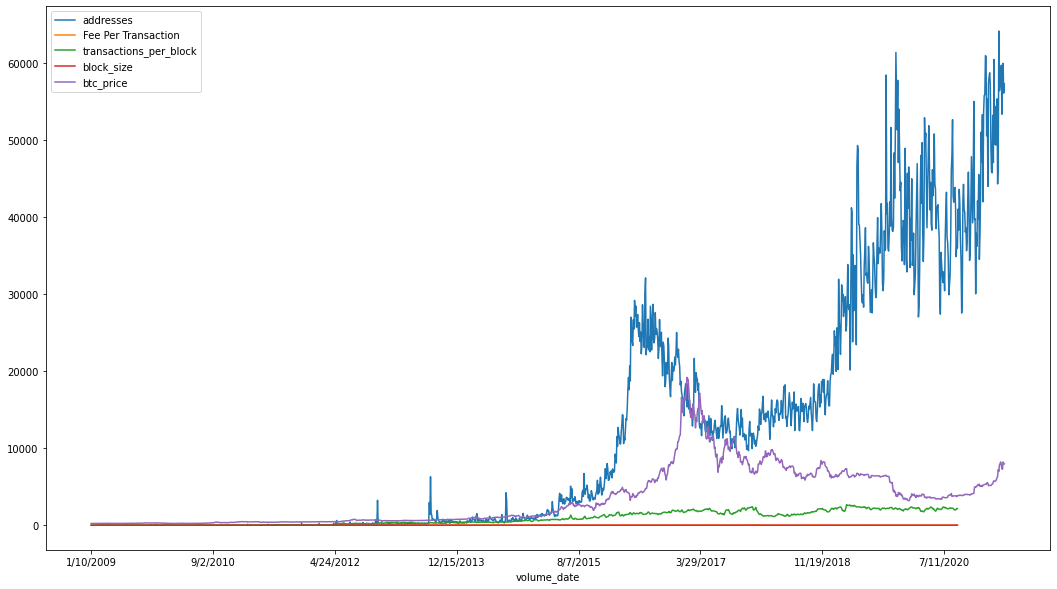

In [75]:
import matplotlib.pyplot as plt
import numpy as np

onchain.plot(x='volume_date', y=['addresses','Fee Per Transaction', 'transactions_per_block', 'block_size', 'btc_price'], figsize=(18,10))

In [ ]:
from_symbol = 'LINK'
to_symbol = 'USD'
exchange = 'Coinbase'
datetime_interval = 'day'


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
link = convert_to_dataframe(data)
link = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
link.to_csv(filename, index=False)

In [ ]:
from_symbol = 'ETH'
to_symbol = 'USD'
exchange = 'Coinbase'
datetime_interval = 'day'


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
eth = convert_to_dataframe(data)
eth = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
eth.to_csv(filename, index=False)

In [ ]:
from_symbol = 'XRP'
to_symbol = 'USD'
exchange = 'Coinbase'
datetime_interval = 'day'


data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
xrp = convert_to_dataframe(data)
xrp = filter_empty_datapoints(df)
current_datetime = datetime.now().date().isoformat()
filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
print('Saving data to %s' % filename)
xrp.to_csv(filename, index=False)

In [ ]:
btc['link'] = link['close']
btc['eth'] = eth['close']
btc['xrp'] = xrp['close']

btc

In [79]:
import pandas as pd
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = filename
    # change type from object to datetime
    df.datetime = pd.to_datetime(df.datetime) 
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df
btc = read_dataset(btc)

Reading data from        datetime       low      high  ...     close  volumefrom     volumeto
0    2015-04-13    219.64    236.90  ...    222.87    13823.98   3166493.61
1    2015-04-14    210.00    224.79  ...    216.42    18432.86   4015453.32
2    2015-04-15    214.05    222.43  ...    221.51     9766.32   2147063.57
3    2015-04-16    221.51    229.67  ...    227.59    11002.79   2492640.64
4    2015-04-17    220.00    228.29  ...    221.86     5767.04   1291923.73
...         ...       ...       ...  ...       ...         ...          ...
1996 2020-09-29  10636.66  10865.00  ...  10836.42     4029.39  43240291.78
1997 2020-09-30  10658.56  10847.50  ...  10778.22     4304.62  46247317.60
1998 2020-10-01  10437.08  10940.22  ...  10622.71     8678.35  92766078.67
1999 2020-10-02  10380.00  10667.53  ...  10578.54     8333.46  87627773.65
2000 2020-10-03  10500.00  10605.79  ...  10574.87      653.64   6890363.71

[2001 rows x 7 columns]
(2001, 6)


In [80]:
btc

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61
2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32
2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57
2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64
2015-04-17,220.00,228.29,227.59,221.86,5767.04,1291923.73
...,...,...,...,...,...,...
2020-09-29,10636.66,10865.00,10689.48,10836.42,4029.39,43240291.78
2020-09-30,10658.56,10847.50,10836.42,10778.22,4304.62,46247317.60
2020-10-01,10437.08,10940.22,10778.22,10622.71,8678.35,92766078.67


In [81]:
!pip install stockstats

In [82]:
from stockstats import StockDataFrame
df = StockDataFrame.retype(btc)
df['macd'] = df.get('macd') # calculate MACD

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


In [83]:
df

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh
datetime,,,,,,,,,
2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61,0.000000,0.000000,0.000000
2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32,-0.144712,-0.080395,-0.064316
2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57,-0.026551,-0.058328,0.031777
2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64,0.247358,0.045224,0.202134
2015-04-17,220.00,228.29,227.59,221.86,5767.04,1291923.73,0.162979,0.080254,0.082725
...,...,...,...,...,...,...,...,...,...
2020-09-29,10636.66,10865.00,10689.48,10836.42,4029.39,43240291.78,-47.062918,-84.952787,37.889869
2020-09-30,10658.56,10847.50,10836.42,10778.22,4304.62,46247317.60,-38.141367,-75.590503,37.449136
2020-10-01,10437.08,10940.22,10778.22,10622.71,8678.35,92766078.67,-43.122245,-69.096852,25.974607


In [84]:
price = df['close']



 
sma_50 = price.rolling(window=50).mean()
sma_100 = price.rolling(window=100).mean()
sma_200 = price.rolling(window=200).mean()
sma_500 = price.rolling(window=500).mean()
 


df['sma50'] = sma_50
df['sma100'] = sma_100
df['sma200'] = sma_200
df['sma500'] = sma_500

In [85]:
def vol_calc(window_length, series):
  roller = series.rolling(window=window_length)
  volList = roller.std(ddof=0)
  return(volList)

In [86]:
df['vol_3'] = vol_calc(3, price)
df['vol_12'] = vol_calc(12, price)
df['vol_24']= vol_calc(24, price)

df.head(300)

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24
datetime,,,,,,,,,,,,,,,,
2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32,-0.144712,-0.080395,-0.064316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57,-0.026551,-0.058328,0.031777,NaN,NaN,NaN,NaN,2.776092,NaN,NaN
2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64,0.247358,0.045224,0.202134,NaN,NaN,NaN,NaN,4.566100,NaN,NaN
2015-04-17,220.00,228.29,227.59,221.86,5767.04,1291923.73,0.162979,0.080254,0.082725,NaN,NaN,NaN,NaN,2.787309,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-02,369.73,375.00,371.79,373.18,5655.12,2109726.06,-12.457062,-11.052939,-1.404122,420.1066,389.0402,320.41015,NaN,1.298923,9.817925,25.053511
2016-02-03,365.00,374.00,373.05,367.64,7030.20,2602788.49,-12.756483,-11.393648,-1.362835,418.1872,389.8584,320.86470,NaN,2.319329,10.732752,23.420712
2016-02-04,367.95,391.88,368.40,390.00,13133.51,5017103.32,-11.061995,-11.327317,0.265322,416.8852,390.8067,321.43720,NaN,9.507737,10.880797,20.404108


In [87]:
df

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24
datetime,,,,,,,,,,,,,,,,
2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32,-0.144712,-0.080395,-0.064316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57,-0.026551,-0.058328,0.031777,NaN,NaN,NaN,NaN,2.776092,NaN,NaN
2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64,0.247358,0.045224,0.202134,NaN,NaN,NaN,NaN,4.566100,NaN,NaN
2015-04-17,220.00,228.29,227.59,221.86,5767.04,1291923.73,0.162979,0.080254,0.082725,NaN,NaN,NaN,NaN,2.787309,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29,10636.66,10865.00,10689.48,10836.42,4029.39,43240291.78,-47.062918,-84.952787,37.889869,11076.4420,10506.0329,9319.78285,9169.02662,60.566156,223.533459,271.405340
2020-09-30,10658.56,10847.50,10836.42,10778.22,4304.62,46247317.60,-38.141367,-75.590503,37.449136,11064.1536,10516.9839,9347.82710,9174.18306,60.418348,215.042880,263.886265
2020-10-01,10437.08,10940.22,10778.22,10622.71,8678.35,92766078.67,-43.122245,-69.096852,25.974607,11045.3008,10526.9829,9374.22245,9179.41720,90.211212,183.362978,258.859314


In [88]:
vol_12 = list(df['vol_12'])
vol_3 = list(df['vol_3'])
vol_24 = list(df['vol_24'])

No handles with labels found to put in legend.


0  12298
0.236 11550.824
0.382 11088.588
0.618 10341.412
1  9132


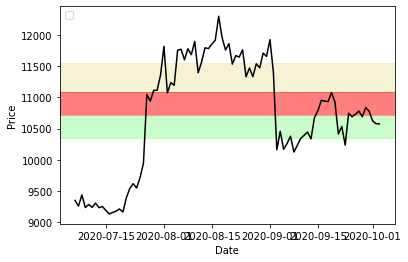

In [89]:
import matplotlib.pyplot as plt
 
fibs = df['close'][-90::]
 
price_min = fibs.min()
price_max = fibs.max()
 
price_min = int(price_min)
price_min
 
price_max = int(price_max)
price_max
 
 
diff = price_max - price_min

level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
guide_level = price_max - 0.500 * diff
level3 = price_max - 0.618 * diff
 

print("0 ", price_max)
print("0.236", level1)
print("0.382", level2)
print("0.618", level3)
print("1 ", price_min)
 
 
 
fig, ax = plt.subplots()
ax.plot(btc['close'][-90::], color='black')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(guide_level, level2, alpha=0.5, color='red')
ax.axhspan(level3, guide_level, alpha=0.5, color='palegreen')

 
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2)
plt.show()

In [92]:
df['active_scaled'] = onchain['addresses'] / 100 

In [93]:
df

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24,active_scaled
datetime,,,,,,,,,,,,,,,,,
2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32,-0.144712,-0.080395,-0.064316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57,-0.026551,-0.058328,0.031777,NaN,NaN,NaN,NaN,2.776092,NaN,NaN,NaN
2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64,0.247358,0.045224,0.202134,NaN,NaN,NaN,NaN,4.566100,NaN,NaN,NaN
2015-04-17,220.00,228.29,227.59,221.86,5767.04,1291923.73,0.162979,0.080254,0.082725,NaN,NaN,NaN,NaN,2.787309,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29,10636.66,10865.00,10689.48,10836.42,4029.39,43240291.78,-47.062918,-84.952787,37.889869,11076.4420,10506.0329,9319.78285,9169.02662,60.566156,223.533459,271.405340,NaN
2020-09-30,10658.56,10847.50,10836.42,10778.22,4304.62,46247317.60,-38.141367,-75.590503,37.449136,11064.1536,10516.9839,9347.82710,9174.18306,60.418348,215.042880,263.886265,NaN
2020-10-01,10437.08,10940.22,10778.22,10622.71,8678.35,92766078.67,-43.122245,-69.096852,25.974607,11045.3008,10526.9829,9374.22245,9179.41720,90.211212,183.362978,258.859314,NaN


In [95]:
!pip install bokeh
from bokeh.models import BoxAnnotation
from bokeh.plotting import figure, output_file, show
from bokeh.models import PolyDrawTool
from bokeh.models import ColumnDataSource, Band

TOOLS = "pan,wheel_zoom, poly_draw, box_zoom,reset,save"
source = ColumnDataSource('xs', 'ys')

from math import pi
from bokeh.plotting import figure, show, output_notebook, output_file
output_notebook()
datetime_from = '2015-04-08 00:00'
datetime_to = '2020-10-03 00:00'
def get_candlestick_width(datetime_interval):
    if datetime_interval == 'minute':
        return 30 * 60 * 1000  # half minute in ms
    elif datetime_interval == 'hour':
        return 0.5 * 60 * 60 * 1000  # half hour in ms
    elif datetime_interval == 'day':
        return 12 * 60 * 60 * 1000  # half day in ms
df_limit = df[datetime_from: datetime_to].copy()
inc = df_limit.close > df_limit.open
dec = df_limit.open > df_limit.close
title = '%s datapoints from %s to %s for %s and %s from %s with MACD strategy' % (
    datetime_interval, datetime_from, datetime_to, from_symbol, to_symbol, exchange)
p = figure(x_axis_type="datetime",  plot_width=1500, title=title, tools=TOOLS)
p.line(df_limit.index, df_limit.close, color='black')
# plot macd strategy
p.line(df_limit.index, 0, color='black')
p.line(df_limit.index, df_limit.macd, color='blue')
p.line(df_limit.index, df_limit.macds, color='orange')

low_box = BoxAnnotation(bottom=level1,top=level2, fill_alpha=0.1, fill_color='blue')
mid_box = BoxAnnotation(bottom=level2,top=guide_level, fill_alpha=0.1, fill_color='yellow')
guide_box = BoxAnnotation(bottom=guide_level, fill_alpha=0.1, fill_color='purple')
high_box = BoxAnnotation(bottom=level3, fill_alpha=0.1, fill_color='red')


p.add_layout(low_box)
p.add_layout(mid_box)
p.add_layout(guide_box)
p.add_layout(high_box)

p.xgrid[0].grid_line_color=None
p.ygrid[0].grid_line_alpha=0.5
p.vbar(x=df_limit.index, bottom=[
       0 for _ in df_limit.index], top=df_limit.macdh, width=10, color="purple")
# plot candlesticks
candlestick_width = get_candlestick_width(datetime_interval)
p.segment(df_limit.index, df_limit.high,
          df_limit.index, df_limit.low, color="black")
p.vbar(df_limit.index[inc], candlestick_width, df_limit.open[inc],
       df_limit.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df_limit.index[dec], candlestick_width, df_limit.open[dec],
       df_limit.close[dec], fill_color="#F2583E", line_color="black")
p.line(df_limit.index, df_limit.sma50, color='red', line_width=2)
p.line(df_limit.index, df_limit.sma100, color='blue', line_width=3)
p.line(df_limit.index, df_limit.sma200, color='green', line_width=3)
p.line(df_limit.index, df_limit.sma500, color='purple', line_width=3)
p.line(df_limit.index, df_limit.vol_24, color='purple', line_width=3)
p.line(df_limit.index, df_limit.vol_3, color='green', line_width=3)
p.line(df_limit.index, df_limit.active_scaled, color='aqua', line_width=3)


r = p.multi_line(source=source)
tool = PolyDrawTool(renderers=[r])
p.add_tools(tool)


output_file("visualizing_trading_strategy.html", title="visualizing trading strategy")
show(p)


In [97]:
df

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh,sma50,sma100,sma200,sma500,vol_3,vol_12,vol_24,active_scaled
datetime,,,,,,,,,,,,,,,,,
2015-04-13,219.64,236.90,236.30,222.87,13823.98,3166493.61,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-14,210.00,224.79,222.87,216.42,18432.86,4015453.32,-0.144712,-0.080395,-0.064316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,214.05,222.43,216.42,221.51,9766.32,2147063.57,-0.026551,-0.058328,0.031777,NaN,NaN,NaN,NaN,2.776092,NaN,NaN,NaN
2015-04-16,221.51,229.67,221.51,227.59,11002.79,2492640.64,0.247358,0.045224,0.202134,NaN,NaN,NaN,NaN,4.566100,NaN,NaN,NaN
2015-04-17,220.00,228.29,227.59,221.86,5767.04,1291923.73,0.162979,0.080254,0.082725,NaN,NaN,NaN,NaN,2.787309,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29,10636.66,10865.00,10689.48,10836.42,4029.39,43240291.78,-47.062918,-84.952787,37.889869,11076.4420,10506.0329,9319.78285,9169.02662,60.566156,223.533459,271.405340,NaN
2020-09-30,10658.56,10847.50,10836.42,10778.22,4304.62,46247317.60,-38.141367,-75.590503,37.449136,11064.1536,10516.9839,9347.82710,9174.18306,60.418348,215.042880,263.886265,NaN
2020-10-01,10437.08,10940.22,10778.22,10622.71,8678.35,92766078.67,-43.122245,-69.096852,25.974607,11045.3008,10526.9829,9374.22245,9179.41720,90.211212,183.362978,258.859314,NaN


In [113]:
onchain

,utxo_date,UTXO,hash_date,hashrate,fee_date,Fee Per Transaction,difficulty_date,difficulty,volume_date,volume,transactions_per_block_date,transactions_per_block,block_size_date,block_size,address_date,addresses,btc_date,btc_price,addresses_scaled,volume_scaled
0,1/21/2009,9.942099e+02,2/2/2009,0.000004,1/24/2009,0.0,1/10/2009,0.285714,1/10/2009,0.0,1/24/2009,1.011248,1/24/2009,0.000224,2009-01-03T00:00:00Z,NaN,2015-04-13,222.87,NaN,0.0
1,1/25/2009,1.387618e+03,2/5/2009,0.000005,1/27/2009,0.0,1/13/2009,0.571429,1/13/2009,0.0,1/27/2009,1.010375,1/27/2009,0.000226,2009-01-04T00:00:00Z,NaN,2015-04-14,216.42,NaN,0.0
2,1/28/2009,1.788808e+03,2/8/2009,0.000006,1/30/2009,0.0,1/16/2009,1.000000,1/16/2009,0.0,1/30/2009,1.009002,1/30/2009,0.000224,2009-01-05T00:00:00Z,NaN,2015-04-15,221.51,NaN,0.0
3,1/31/2009,2.190178e+03,2/11/2009,0.000006,2/2/2009,0.0,1/19/2009,1.000000,1/19/2009,0.0,2/2/2009,1.006441,2/2/2009,0.000224,2009-01-06T00:00:00Z,NaN,2015-04-16,227.59,NaN,0.0
4,2/4/2009,2.592723e+03,2/14/2009,0.000006,2/5/2009,0.0,1/22/2009,1.000000,1/22/2009,0.0,2/5/2009,1.021040,2/5/2009,0.000225,2009-01-07T00:00:00Z,NaN,2015-04-17,221.86,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,9/18/2020,6.803477e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-06T00:00:00Z,53365.0,2019-05-17,7351.71,17788.333333,NaN
1496,9/21/2020,6.801692e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-07T00:00:00Z,58185.0,2019-05-18,7260.12,19395.000000,NaN
1497,9/24/2020,6.809273e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-08T00:00:00Z,59968.0,2019-05-19,8200.00,19989.333333,NaN
1498,9/26/2020,6.830398e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-09T00:00:00Z,56105.0,2019-05-20,8005.64,18701.666667,NaN


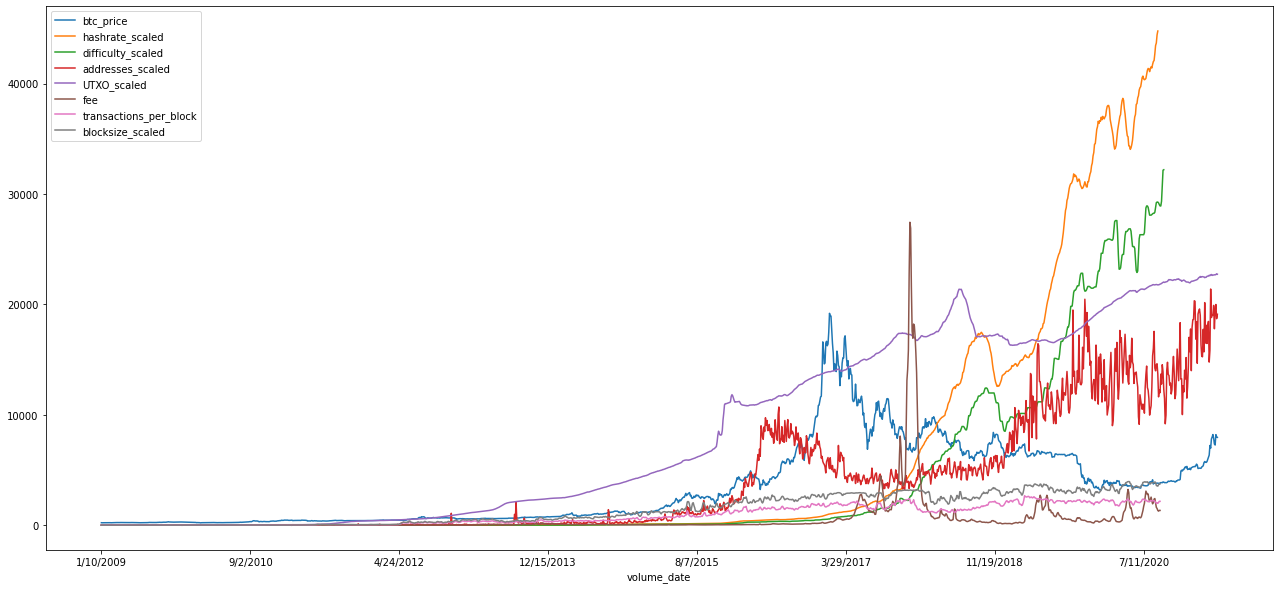

In [141]:
onchain['addresses_scaled'] = onchain['addresses']/3
onchain['fee'] = onchain['Fee Per Transaction']*600
onchain['UTXO_scaled'] = onchain['UTXO']/3000
onchain['hashrate_scaled'] = onchain['hashrate']/3000
onchain['blocksize_scaled'] = onchain['block_size']*3000
onchain['difficulty_scaled'] = onchain['difficulty']/600000000


onchain.plot(x='volume_date', y=['btc_price','hashrate_scaled','difficulty_scaled','addresses_scaled', 'UTXO_scaled', 
                                 'fee', 'transactions_per_block', 'blocksize_scaled'], figsize=(22,10))

#prophet models to predict the price, this will be a long term and daily predictor. Daily will rely on open price to predict the daily outcome as it is a time dependent feature.

In [ ]:
!pip install sklearn
!pip install fbprophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
df

In [ ]:
df.to_csv('btc_w_macd.csv')

In [ ]:
df = pd.read_csv('btc_w_macd.csv')

In [ ]:
df

In [ ]:
s2f_data = pd.read_csv('Bitcoin_Data_With_S2F.csv')

In [ ]:
s2f_data

In [ ]:
moving_vol = df['volumeto']

moving_vol_10 = moving_vol.rolling(window=10).mean()

In [ ]:
btc = pd.DataFrame()
btc['ds'] = df['datetime']
btc['y'] = df['close']
btc['open'] = df['open']
btc['macd'] = df['macd']
btc['macds'] = df['macds']
btc['moving_vol_10'] = moving_vol_10
btc['S2F'] = s2f_data['S2F']

In [ ]:
btc

In [ ]:
btc.describe()

In [ ]:
sns.distplot(btc['y'])

In [ ]:
sns.distplot(btc['macd'])

In [ ]:
sns.distplot(btc['macds'])

In [ ]:
btc.to_csv('btc_macd_ema_s2f.csv')

In [ ]:
btc = pd.read_csv('btc_macd_ema_s2f.csv')

In [ ]:
btc['ema'] = df['ema10']

In [ ]:
btc

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = btc[['y', 'macd', "S2F", 'ema']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [ ]:
vif

In [ ]:
btc_train,btc_test = train_test_split(btc, test_size=0.08, shuffle=False)

In [ ]:
del btc_model

In [ ]:
from fbprophet import Prophet
btc_daily = Prophet(daily_seasonality = True) # the Prophet class (model)
btc_daily.add_regressor('macd')
btc_daily.add_regressor('S2F')
btc_daily.add_regressor('open')
btc_daily.add_regressor('ema')

btc_daily.fit(btc_train) # fit the model using all data

In [ ]:
prediction = btc_daily.predict(btc)
btc_daily.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()

#By limiting the train/test split to 5% the result become much more accurate. I believe this indicates that this model will be better at detecting moderately short term movements (10 days or so). This is most likely due to the windows used for moving average and volatility in the market. Although the results of the 15% split were still moderately accurate, but with a larger spike to 15k. 

#This will impact the range of forecasting this model will produce before a wide range of volatility (potentially 10 day windows will be best?)


#I am undecided if the spike it called for is just being prolonged or if the recent whale moves (sept 2020) artificially delayed the pump to a later time after accumulation. To attempt and predict this I will create a seperate prophet model to predict moving volume and S2F. These will then be combined with the results of the MACD forecaster to make a prediction in this model. Each will need to be refined to reduce loss.  

In [ ]:
btc_daily.plot_components(prediction)

In [ ]:
prediction

In [ ]:
!pip install bokeh

In [ ]:
btc['pred_date_2'] = prediction['ds']
btc['full_preds'] = prediction['yhat']

btc.to_csv('btc_s2f_vol_macd_preds.csv')

In [ ]:
btc['full_results'] = btc['y'].sub(btc['full_preds'])

In [ ]:
sns.distplot(btc['full_results'])

In [ ]:
results = btc['full_results']
plt.figure(); results.plot(style='k--', label='Difference ($)'); plt.legend()
plt.title("Difference in Price Prediction Bitcoin using the Prophet Model")
#plt.xlabel("Date")
plt.ylabel("Close BTC Price")
plt.show()

In [ ]:
btc

In [ ]:
btc.to_csv('macd_preds_1.csv')

In [ ]:
macd = pd.read_csv('macd_90_day.csv')
macds = pd.read_csv('macds_90_day.csv')

In [ ]:
macd

In [ ]:
macds

In [ ]:
future = pd.DataFrame()
future['ds'] = macds['ds']
future['macd'] = macd['macd']
future['macds'] = macds['macds']

In [ ]:
future

In [ ]:
prediction = btc_model.predict(future)
btc_model.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()

In [ ]:
macd_365 = pd.read_csv('macd_365_day.csv')
macds_365 = pd.read_csv('macds_365_day.csv')

In [ ]:
future_year = pd.DataFrame()
future_year['ds'] = macds_365['ds']
future_year['macd'] = macd_365['macd']
future_year['macds'] = macds_365['macds']

In [ ]:
future_year

In [ ]:
prediction = btc_model.predict(future_year)
btc_model.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()

In [ ]:
macd_180 = pd.read_csv('macd_180_day.csv')
macds_180 = pd.read_csv('macds_180_day.csv')

In [ ]:
future_6 = pd.DataFrame()
future_6['ds'] = macds_180['ds']
future_6['macd'] = macd_180['macd']
future_6['macds'] = macds_180['macds']

In [ ]:
future_6

In [ ]:
prediction = btc_model.predict(future_6)
btc_model.plot(prediction)
plt.title("Prediction of Bitcoin using the Prophet Model")
plt.xlabel("Date")
plt.ylabel("Close Bitcoin Price")
plt.show()